In [1]:
import os, re, struct
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from collections import Counter

In [2]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
client.CPS.list_collection_names()
CPS = client.CPS

In [3]:
CPS.list_collection_names()

['PEEDUCA', 'PREMPNOT', 'PESEX', 'PTDTRACE']

In [4]:
CPS.PEEDUCA

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'CPS'), 'PEEDUCA')

In [5]:
PEEDUCA = CPS.PEEDUCA.find_one()
PREMPNOT = CPS.PREMPNOT.find_one()
PESEX = CPS.PESEX.find_one()
PTDTRACE = CPS.PTDTRACE.find_one()

In [6]:
temp_df = pd.DataFrame({
    'PREMPNOT': PREMPNOT['jan'],
    'PESEX': PESEX['jan'],
    'PEEDUCA': PEEDUCA['jan'],
    'PTDTRACE': PTDTRACE['jan']
})
temp_df

,PREMPNOT,PESEX,PEEDUCA,PTDTRACE
0,4,1,38,2
1,4,2,40,2
2,4,1,40,1
3,1,1,39,1
4,1,2,43,1
...,...,...,...,...
138692,2,2,40,1
138693,1,1,42,1
138694,-1,-1,-1,-1
138695,-1,-1,-1,-1


In [7]:
unemployed = temp_df.loc[temp_df['PREMPNOT']>1]
c = dict(Counter(unemployed['PEEDUCA']))
sorted(c.items())

[(31, 196),
 (32, 270),
 (33, 543),
 (34, 1294),
 (35, 1758),
 (36, 1963),
 (37, 1966),
 (38, 858),
 (39, 11917),
 (40, 6876),
 (41, 1406),
 (42, 1760),
 (43, 5764),
 (44, 2432),
 (45, 343),
 (46, 407)]

In [8]:
edu_df = pd.DataFrame.from_dict(c, orient = 'index')
edu_df.sort_index(inplace = True)
edu_df[0] = (edu_df[0]/edu_df[0].sum()) * 100

In [9]:
import matplotlib.pyplot as plt

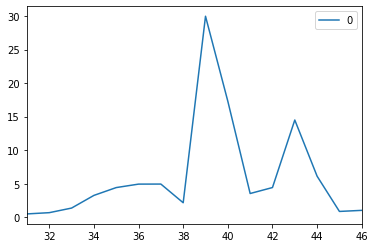

In [10]:
edu_df.plot()